In [ ]:
!pip install tqdm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from keras.preprocessing import image
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
os.listdir('C:\\Users\\nhvis\\Downloads\\rice\\NitrogenDeficiencyImage\\NitrogenDeficiencyImage\\Training')

['swap1', 'swap2', 'swap3', 'swap4']

In [3]:
image_directory= 'C:\\Users\\nhvis\\Downloads\\rice\\NitrogenDeficiencyImage\\NitrogenDeficiencyImage\\Training\\'
swap1=os.listdir(image_directory+'swap1/')
swap2=os.listdir(image_directory+'swap2/')
swap3=os.listdir(image_directory+'swap3/')
swap4=os.listdir(image_directory+'swap4/')

In [4]:
print(len(swap1))
print(len(swap2))
print(len(swap3))
print(len(swap4))

1407
1203
1400
1380


In [5]:
print(swap1)

['SWAP_TR1_001.jpg', 'SWAP_TR1_002.jpg', 'SWAP_TR1_003.jpg', 'SWAP_TR1_004.jpg', 'SWAP_TR1_005.jpg', 'SWAP_TR1_006.jpg', 'SWAP_TR1_007.jpg', 'SWAP_TR1_008.jpg', 'SWAP_TR1_009.jpg', 'SWAP_TR1_010.jpg', 'SWAP_TR1_011.jpg', 'SWAP_TR1_012.jpg', 'SWAP_TR1_013.jpg', 'SWAP_TR1_014.jpg', 'SWAP_TR1_015.jpg', 'SWAP_TR1_016.jpg', 'SWAP_TR1_017.jpg', 'SWAP_TR1_018.jpg', 'SWAP_TR1_019.jpg', 'SWAP_TR1_020.jpg', 'SWAP_TR1_021.jpg', 'SWAP_TR1_022.jpg', 'SWAP_TR1_023.jpg', 'SWAP_TR1_024.jpg', 'SWAP_TR1_025.jpg', 'SWAP_TR1_026.jpg', 'SWAP_TR1_027.jpg', 'SWAP_TR1_028.jpg', 'SWAP_TR1_029.jpg', 'SWAP_TR1_030.jpg', 'SWAP_TR1_031.jpg', 'SWAP_TR1_032.jpg', 'SWAP_TR1_033.jpg', 'SWAP_TR1_034.jpg', 'SWAP_TR1_035.jpg', 'SWAP_TR1_036.jpg', 'SWAP_TR1_037.jpg', 'SWAP_TR1_038.jpg', 'SWAP_TR1_039.jpg', 'SWAP_TR1_040.jpg', 'SWAP_TR1_041.jpg', 'SWAP_TR1_042.jpg', 'SWAP_TR1_043.jpg', 'SWAP_TR1_044.jpg', 'SWAP_TR1_045.jpg', 'SWAP_TR1_046.jpg', 'SWAP_TR1_047.jpg', 'SWAP_TR1_048.jpg', 'SWAP_TR1_049.jpg', 'SWAP_TR1_050.jpg',

In [6]:
image_directory= 'C:\\Users\\nhvis\\Downloads\\rice\\NitrogenDeficiencyImage\\NitrogenDeficiencyImage\\Training\\swap1\\*.jpg'
glob.glob(image_directory)
images=[cv2.cvtColor(cv2.imread(image_directory),cv2.COLOR_BGR2RGB) for image_directory in glob.glob(image_directory)]

In [7]:
type(images)
len(images)

1407

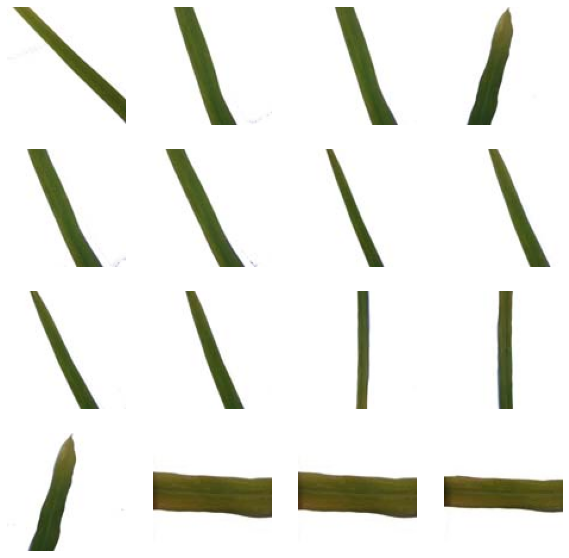

In [8]:
fig=plt.figure(figsize=(10,10))
rows,cols=4,4
for j in range(0,cols*rows):
    fig.add_subplot(rows,cols,j+1)
    plt.imshow(images[j])
    plt.axis('off')
plt.show()

In [9]:
imagePaths = []
for dirname, _, filenames in os.walk('C:\\Users\\nhvis\\Downloads\\rice\\NitrogenDeficiencyImage\\NitrogenDeficiencyImage\\Training'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            imagePaths.append(os.path.join(dirname, filename))

In [10]:
Data = []
Target = []
resize = 255

cat = {'swap1': 'swap1',
       'swap2': 'swap2',
       'swap3': 'swap3',
       'swap4': 'swap4'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

100%|█████████████████████████████████████████████████████████████████████████████| 5390/5390 [00:11<00:00, 461.40it/s]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


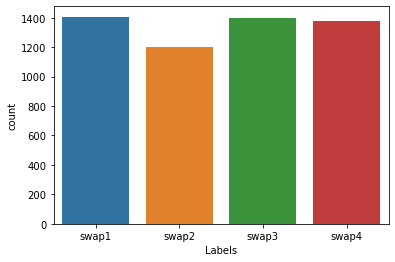

In [11]:
df=pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

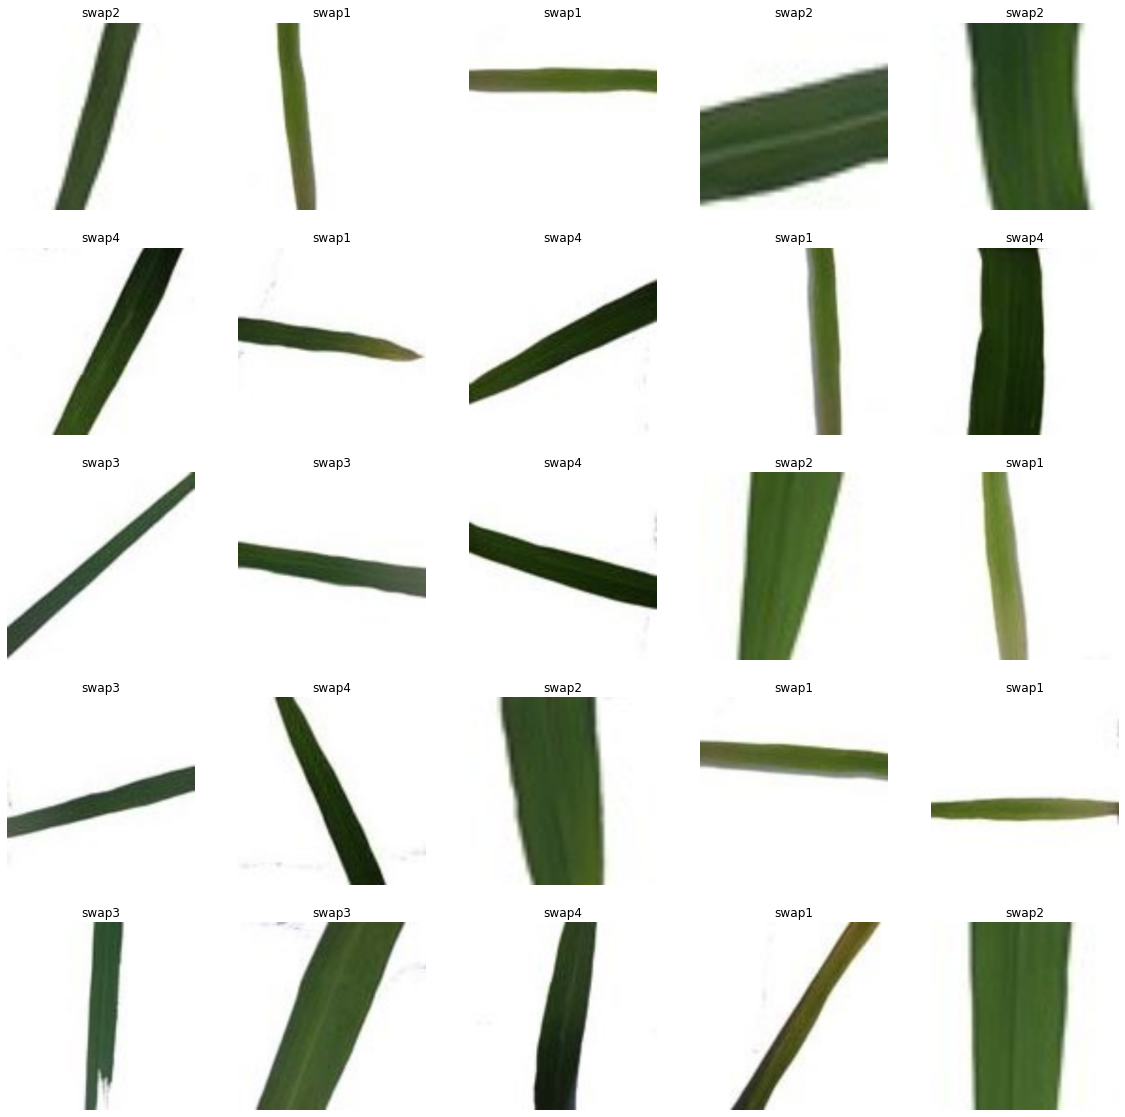

In [12]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(imagePaths),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i], cmap='gray')
    plt.title(Target[i])
    plt.axis('off')
plt.show()

In [13]:
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels)

['swap1' 'swap2' 'swap3' 'swap4']
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [14]:
(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.40,stratify=labels,random_state=42)
                 

                                     

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

s = 255 # size

(3234, 255, 255, 3)
(2156, 255, 255, 3)
(3234, 4)
(2156, 4)


In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))

In [16]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

print(model.summary())

history=model.fit(trainX, trainY, epochs=15, batch_size=40, verbose=1)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 128)      0

In [17]:
modelLoss, modelAccuracy=model.evaluate(testX, testY)
print('Test Loss is{}'.format(modelLoss))
print('Test Accuracy is{}'.format(modelAccuracy))


68/68 [==============================] - 26s 335ms/step - loss: 0.1098 - accuracy: 0.9926
Test Loss is0.10984665155410767
Test Accuracy is0.9925788640975952


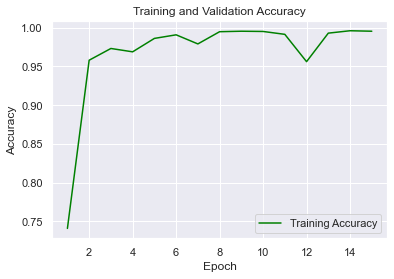

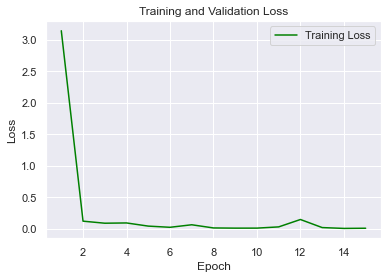

In [18]:
sns.set()

acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1, len(loss) + 1)

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='green', label='Training Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
model.save("nitrogen_deficiency_image_model.h5")

In [20]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

81/81 [==============================] - 36s 429ms/step
              precision    recall  f1-score   support

       swap1    1.00000   1.00000   1.00000       844
       swap2    1.00000   1.00000   1.00000       722
       swap3    1.00000   1.00000   1.00000       840
       swap4    1.00000   1.00000   1.00000       828

    accuracy                        1.00000      3234
   macro avg    1.00000   1.00000   1.00000      3234
weighted avg    1.00000   1.00000   1.00000      3234



68/68 [==============================] - 24s 336ms/step
swap1


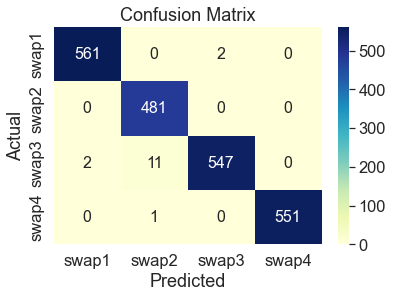

In [21]:
class_names = ['swap1', 'swap2', 'swap3', 'swap4']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()